### Import Pyhton Lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


### Load the data

In [2]:
df =  pd.read_csv('../data/Zomato-data-.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Fix rate column

In [3]:
def fix_rate(value):
    value = str(value).split('/')[0]
    return float(value)

df['rate'] = df['rate'].apply(fix_rate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### Summary of the data

In [4]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [5]:
df.describe(include='O')

,name,online_order,book_table,listed_in(type)
count,148,148,148,148
unique,145,2,2,4
top,San Churro Cafe,No,No,Dining
freq,2,90,140,110


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### Check for missing data

In [7]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### Explore Resturante Type

`Seaborn`

Text(0.5, 1.0, 'Number of People Visited by Type of Restaurant')

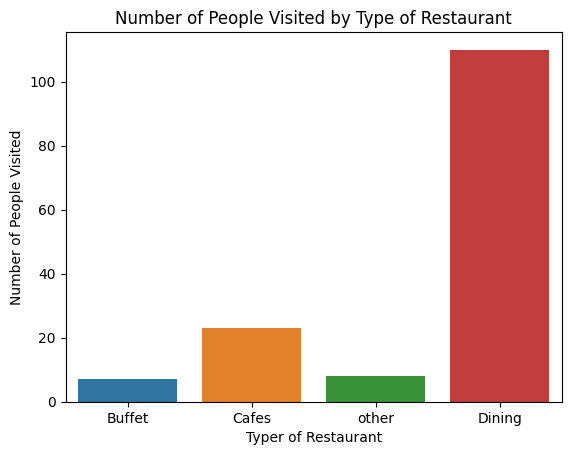

In [8]:
sns.countplot(x=df['listed_in(type)'],hue=df['listed_in(type)'])
plt.xlabel('Typer of Restaurant')
plt.ylabel('Number of People Visited')
plt.title('Number of People Visited by Type of Restaurant')

`Plotly`

In [9]:
fig = px.histogram(
    df,
    x='listed_in(type)',
    color='listed_in(type)',
    title='Number of People Visited by Type of Restaurant',
    text_auto=True,
    labels={'listed_in(type)': 'Type of Restaurant', 'count': 'Number of People Visited'}
)

fig.update_layout(
    template='plotly_white',
    width=1000
)

fig.show()

Here, it is evident that `Dining` is the most popular type of restaurant.

### Votes By Resturents Types

In [10]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum().reset_index()
grouped_data

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


In [11]:
fig = px.line(
    grouped_data,
    x='listed_in(type)',
    y='votes',
    title='Total Votes by Type of Restaurant',
    text='votes',
)

fig.update_layout(
    template='plotly_white',
    width=1000,
    xaxis_title='Type of Restaurant',
    yaxis_title='Total Votes',
)
fig.update_traces(
    textposition='top center',
)
fig.show()

In [12]:
grouped_data = df.groupby('listed_in(type)')['votes'].mean().reset_index()
grouped_data['votes'] = grouped_data['votes'].round(0)

In [13]:
fig = px.line(
    grouped_data,
    x='listed_in(type)',
    y='votes',
    title='Avarage Votes by Type of Restaurant',
    text='votes',
)

fig.update_layout(
    template='plotly_white',
    width=1000,
    xaxis_title='Type of Restaurant',
    yaxis_title='Avarage Votes',
)
fig.update_traces(
    textposition='top center',
)
fig.show()

`Dinning` restaurants are preferred by a huge number of individuals

### Most Votes Restaurants

In [14]:
max_vote = df['votes'].max()

In [16]:
df[df['votes'] == max_vote]['name']

38    Empire Restaurant
Name: name, dtype: object

### Online Orders

In [19]:
fig = px.histogram(
    df,
    x='online_order',
    text_auto=True,
    title='Online Orders Availablity',
    color='online_order'
)

fig.update_layout(
    template='plotly_white',
    width=1000,
    xaxis_title='Ordered Online',
    yaxis_title='Number of Orders',
)
fig.show()

Most restaurants are not listed or available on Zomato for online orders or doesn't accept online orders.

### Analyised Rating

In [21]:
fig = px.histogram(
    df,
    x='rate',
    title='Rating Distribution'
)
fig.update_layout(
    template='plotly_white',
    width=1000,
    xaxis_title='Rating',
    yaxis_title='Frequency',
)
fig.show()

For Majority of restaurants the rating is ranging between `3.6` to `3.9`

In [22]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

### Cost analysis for Couples

In [42]:
fig = px.histogram(
    df,
    x='approx_cost(for two people)',
    barmode='group',
    color='approx_cost(for two people)',
    text_auto='approx_cost(for two people)'
)
fig.update_layout(
    template='plotly_white',
    width=1000,
    xaxis_title='cost for two person',
    yaxis_title='Frequency',
)
fig.show()

The prefer cost for two person is `300` rupees

### Compare online and offline Rating

In [49]:
fig = px.box(
    df,
    y='rate',
    x='online_order',
    color='online_order',
    title='Online VS Offline'
)
fig.update_layout(
    template='plotly_white',
    width=1000,
    xaxis_title='Online Orders',
    yaxis_title='Rateing',
)
fig.show()

Online orders resived higher rating in compars to offline. The minmum rating for online `3.1` is better then the minmum rating for offline `2.9`

### Order Mode by Restaurant Type

In [51]:
df_OR = df[['listed_in(type)','online_order']]
df_OR['count'] = 1
df_OR = pd.pivot_table(data=df_OR,index='listed_in(type)',columns='online_order',values='count',aggfunc='sum')
df_OR

C:\Users\c74684\AppData\Local\Temp\ipykernel_24220\117628433.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


In [60]:
fig = px.imshow(
    df_OR,
    text_auto=True,
    title='Heatmap',
    aspect='auto'
)
fig.update_layout(
    template='plotly_white',
    width=1000,
    xaxis_title='Online Orders',
    yaxis_title='Type of Restaurants',
)
fig.show()

Dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.